# 101_food_classes_10_percent Dataset

Let's train a model for prediction of 101 food classes

## Setup

In [ ]:
!nvidia-smi

Mon Aug 28 13:50:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-08-28 13:50:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-28 13:50:16 (62.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2023-08-28 13:50:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.181.128, 64.233.182.128, 64.233.183.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.181.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   227MB/s    in 6.5s    

2023-08-28 13:50:27 (237 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
unzip_data('101_food_classes_10_percent.zip')

In [ ]:
train_dir = '101_food_classes_10_percent/train'
test_dir =  '101_food_classes_10_percent/test'

In [ ]:
walk_through_dir('101_food_classes_10_percent')

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/cheesecake'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/baby_back_ribs'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/creme_brulee'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/ceviche'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/caprese_salad'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/french_fries'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/escargots'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/tuna_tartare'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/garlic_bread'.
There are 0 directories and 250 images 

In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)

train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode = 'categorical',
                                                                 image_size = IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode = 'categorical',
                                                                 image_size = IMG_SIZE,
                                                                 shuffle = False) # we want to keep the same order as it is to fit labels, howver later on we will add functionality for proper shuffeling

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


## Create model checkpoint callback

In [ ]:
checkpoint_path = '101_classes_10_percent_data_model_checkpoints'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                        save_weights_only = True,
                                                        monitor = 'val_accuracy',
                                                        save_best_only = True)

## Data augmentation layer

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),

], name = 'data_augmentation')

## Feature Extraction Model

In [ ]:
len(train_data_all_10_percent.class_names)

101

In [ ]:
train_data_all_10_percent.class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape=(224,224,3), name = 'input_layer')
x = data_augmentation(inputs)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D(name = 'global_avg_pool_layer')(x)
# we need to have 101 points in our output dense layers since we have 101 classes
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation = 'softmax', name = 'output_layer')(x)
model = tf.keras.Model(inputs, outputs)

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pool_layer (Glob  (None, 1280)             0         
 alAveragePooling2D)                                             
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

history_all_classes_10_percent = model.fit(train_data_all_10_percent,
                                           epochs = 5,
                                           validation_data = test_data,
                                           validation_steps = int(0.15 * len(test_data)),
                                           callbacks = [checkpoint_callback])

Epoch 1/5
237/237 [==============================] - 129s 482ms/step - loss: 3.3950 - accuracy: 0.2660 - val_loss: 2.4522 - val_accuracy: 0.4725
Epoch 2/5
237/237 [==============================] - 75s 316ms/step - loss: 2.2148 - accuracy: 0.4916 - val_loss: 2.0246 - val_accuracy: 0.5185
Epoch 3/5
237/237 [==============================] - 66s 279ms/step - loss: 1.8404 - accuracy: 0.5629 - val_loss: 1.8524 - val_accuracy: 0.5387
Epoch 4/5
237/237 [==============================] - 59s 249ms/step - loss: 1.6085 - accuracy: 0.6131 - val_loss: 1.7886 - val_accuracy: 0.5495
Epoch 5/5
237/237 [==============================] - 59s 247ms/step - loss: 1.4558 - accuracy: 0.6417 - val_loss: 1.7221 - val_accuracy: 0.5548


In [ ]:
fe_results = model.evaluate(test_data)
fe_results

790/790 [==============================] - 65s 83ms/step - loss: 1.5778 - accuracy: 0.5872


[1.577790379524231, 0.5871683359146118]

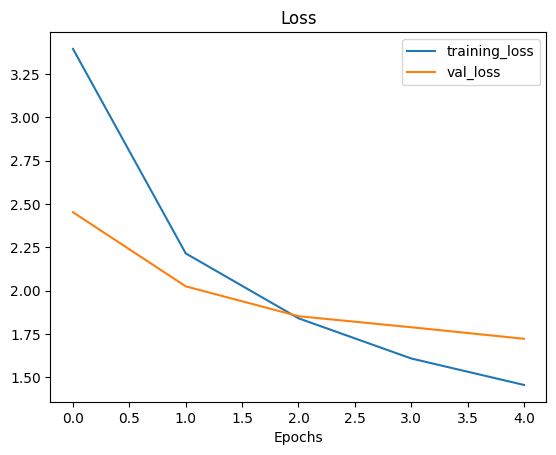

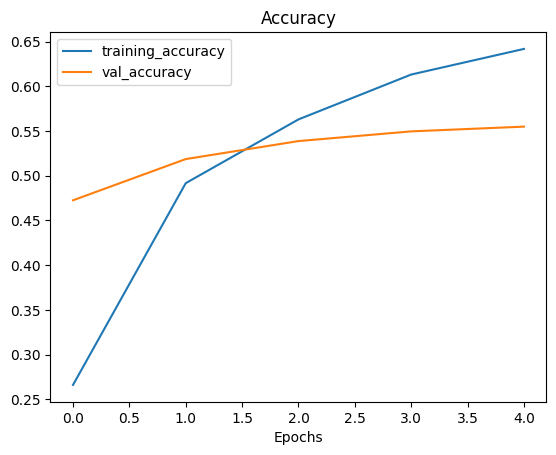

In [ ]:
plot_loss_curves(history_all_classes_10_percent)

Our model is overfitting

## Fine tune model

Let's make some of the layers trainable

In [ ]:
base_model.trainable = True # all layers trainable

# leave trainable only 5 last layers
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [ ]:
# recompile

model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), # lr lowered by 10x (rule of thumb), while we moving into fine tuning we should make our lr a bit smaller
              metrics = ['accuracy'])

In [ ]:
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 True
global_avg_pool_layer True
output_layer True


In [ ]:
for layer_number, layer in enumerate(model.layers[2].layers):
  print(layer_number,layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

As we can see only 5 last layers are trainable

In [ ]:
# fine-tune for 5 more epochs

fine_tune_epochs = 10 # model has already done 5 epochs (feature extraction), now we will add 5 more epochs

# Fine-tune our model
history_all_classes_10_percent_fine_tune = model.fit(train_data_all_10_percent,
                                                     epochs = fine_tune_epochs,
                                                     validation_data = test_data,
                                                     validation_steps = int(0.15 * len(test_data)),
                                                     initial_epoch = history_all_classes_10_percent.epoch[-1]) # we start from last epoch

Epoch 5/10
237/237 [==============================] - 71s 256ms/step - loss: 1.2129 - accuracy: 0.6892 - val_loss: 1.6551 - val_accuracy: 0.5577
Epoch 6/10
237/237 [==============================] - 51s 216ms/step - loss: 1.0974 - accuracy: 0.7106 - val_loss: 1.6495 - val_accuracy: 0.5704
Epoch 7/10
237/237 [==============================] - 50s 207ms/step - loss: 1.0182 - accuracy: 0.7312 - val_loss: 1.6530 - val_accuracy: 0.5659
Epoch 8/10
237/237 [==============================] - 47s 198ms/step - loss: 0.9485 - accuracy: 0.7431 - val_loss: 1.6395 - val_accuracy: 0.5720
Epoch 9/10
237/237 [==============================] - 48s 201ms/step - loss: 0.8862 - accuracy: 0.7651 - val_loss: 1.6715 - val_accuracy: 0.5649
Epoch 10/10
237/237 [==============================] - 44s 182ms/step - loss: 0.8343 - accuracy: 0.7768 - val_loss: 1.6846 - val_accuracy: 0.5636


In [ ]:
all_classes_10_percent_fine_tune_results = model.evaluate(test_data)
all_classes_10_percent_fine_tune_results

790/790 [==============================] - 70s 89ms/step - loss: 1.4807 - accuracy: 0.6084


[1.480695366859436, 0.6083564162254333]

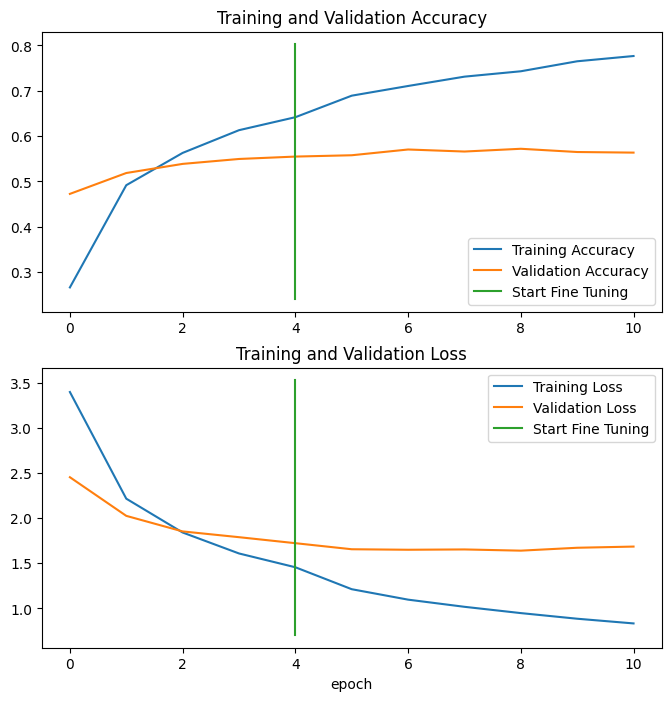

In [ ]:
compare_historys(original_history = history_all_classes_10_percent,
                 new_history = history_all_classes_10_percent_fine_tune,
                 initial_epochs = 5)

Our model is highly overfitting. We need to implement some methods for reducing overfitting.

## Save and Load model

In [ ]:
# from google.colab import drive

# drive.mount('/content/drive')

There is a bug in tf 2.10 and we're not able to save mode. we need to downgrade to 2.9.1 before

In [ ]:
# !pip uninstall tensorflow

In [ ]:
# !pip install tensorflow==2.9.1

In [ ]:
# import tensorflow as tf

# tf.__version__

In [ ]:
# model.save('/content/drive/MyDrive/tensorflow_course_/101_food_classes_10_percent_saved_big_dog_model.keras')

In [ ]:
# import tensorflow as tf

# loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/tensorflow_course_/101_food_classes_10_percent_saved_big_dog_model.keras')

In [ ]:
loaded_model = model

In [ ]:
# evaluate loaded model and compare performance to pre-saved model
loaded_model_results = loaded_model.evaluate(test_data)
loaded_model_results

790/790 [==============================] - 62s 78ms/step - loss: 1.4807 - accuracy: 0.6084


[1.480695366859436, 0.6083564162254333]

In [ ]:
all_classes_10_percent_fine_tune_results

[1.480695366859436, 0.6083564162254333]

Models are roughly the same. The minimal difference is caused by the way computer stores data.

## Evaluating the performance of the big dog model

Let's see how is the accuracy on each class

In [ ]:
import tensorflow as tf


!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2023-08-28 14:06:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 108.177.111.128, 172.253.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip.1’

101_food_classes_10 100%[===================>]   1.51G   154MB/s    in 13s     

2023-08-28 14:07:05 (120 MB/s) - ‘101_food_classes_10_percent.zip.1’ saved [1625420029/1625420029]



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

--2023-08-28 14:07:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-28 14:07:05 (109 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
unzip_data('101_food_classes_10_percent.zip')

In [ ]:
# loaded_model = tf.keras.models.load_model('/content/101_food_classes_10_percent_saved_big_dog_model.keras')

## Making predictions with our model for each class

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

unzip_data('101_food_classes_10_percent.zip')

train_dir = '101_food_classes_10_percent/train'
test_dir =  '101_food_classes_10_percent/test'

import tensorflow as tf

IMG_SIZE = (224, 224)

train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode = 'categorical',
                                                                 image_size = IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode = 'categorical',
                                                                 image_size = IMG_SIZE,
                                                                 shuffle = False) # we want to keep the same order as it is to fit labels, howver later on we will add functionality for proper shuffeling

--2023-08-28 14:07:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 209.85.145.128, 172.217.219.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip.2’

101_food_classes_10 100%[===================>]   1.51G   199MB/s    in 11s     

2023-08-28 14:07:35 (147 MB/s) - ‘101_food_classes_10_percent.zip.2’ saved [1625420029/1625420029]

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
preds_probs = loaded_model.predict(test_data, verbose = 1)

790/790 [==============================] - 72s 89ms/step


We have 790 batches

In [ ]:
790*32

25280

In [ ]:
len(preds_probs)

25250

In [ ]:
preds_probs.shape

(25250, 101)

We have 25250 images and 101 classes (predictions)

In [ ]:
preds_probs[0].argmax()

2

In [ ]:
pred_classes = preds_probs.argmax(axis = 1)
pred_classes

array([  2,   0,   0, ..., 100,  94, 100])

Now we've got predictions array of all our models predictions. To evaluate the we need to compare them to original test data labels.

In [ ]:
y_labels = []

for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())

y_labels

We didn't shuffle our data that's why we have all classes in order

In [ ]:
len(y_labels)

In [ ]:
# Let's check if y_labels and pred_classes are in the same order. Meaning if all classes from both lists refers to the same image

# 1st way comparing accuracy score

from sklearn.metrics import accuracy_score

sklearn_accuracy = accuracy_score(y_true = y_labels,
                                  y_pred = pred_classes)

sklearn_accuracy

In [ ]:
loaded_model_results = loaded_model.evaluate(test_data)
loaded_model_results

790/790 [==============================] - 59s 75ms/step - loss: 1.4807 - accuracy: 0.6084


[1.480695366859436, 0.6083564162254333]

In [ ]:
import numpy as np

np.isclose(sklearn_accuracy, loaded_model_results[1])

True

As we can see both our calculated accuracy and loaded_model_Accuracy are basically the same. That means order of our y_labels and pred_classes classes of images are in the same order. We can proceed...

## Confusion Matrix

In [ ]:
from helper_functions import make_confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
# we need to make some changes to imported make_confusion_matrix since we're dealing with 101 classes

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Changed plot x-labels vertically
  plt.xticks(rotation=70, fontsize = text_size)
  plt.yticks(fontsize = text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")



make_confusion_matrix(y_labels,
                      pred_classes,
                      test_data.class_names,
                      figsize = (100,100),
                      text_size = 20)

## Classification Report

Let's see precision, recall, f1-score and support for all classes

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true = y_labels,
                            y_pred = pred_classes))

Let's visualize it

In [ ]:
classification_report_dict = classification_report(y_labels, pred_classes, output_dict = True)
classification_report_dict

In [ ]:
class_f1_scores = {}

for k, v in classification_report_dict.items():
  if k == 'accuracy':
    break
  else:
    class_f1_scores[test_data.class_names[int(k)]] = v['f1-score']

class_f1_scores

{'apple_pie': 0.2634146341463415,
 'baby_back_ribs': 0.5514285714285715,
 'baklava': 0.6411290322580645,
 'beef_carpaccio': 0.655581947743468,
 'beef_tartare': 0.4513064133016627,
 'beet_salad': 0.4319727891156462,
 'beignets': 0.7827788649706459,
 'bibimbap': 0.7799564270152505,
 'bread_pudding': 0.39097744360902253,
 'breakfast_burrito': 0.5021645021645021,
 'bruschetta': 0.4556354916067146,
 'caesar_salad': 0.6819221967963386,
 'cannoli': 0.6436285097192225,
 'caprese_salad': 0.5443298969072166,
 'carrot_cake': 0.558766859344894,
 'ceviche': 0.403470715835141,
 'cheese_plate': 0.6222222222222222,
 'cheesecake': 0.41167434715821816,
 'chicken_curry': 0.5,
 'chicken_quesadilla': 0.656964656964657,
 'chicken_wings': 0.7345309381237526,
 'chocolate_cake': 0.5616161616161617,
 'chocolate_mousse': 0.3655913978494624,
 'churros': 0.7272727272727273,
 'clam_chowder': 0.7109375,
 'club_sandwich': 0.6993318485523385,
 'crab_cakes': 0.37946428571428564,
 'creme_brulee': 0.7751004016064257,
 'c

In [ ]:
import pandas as pd

f1_scores = pd.DataFrame({'class_names':list(class_f1_scores.keys()),
                          'f1-score':list(class_f1_scores.values())}).sort_values('f1-score', ascending = False)

f1_scores

class_names  f1-score
33      edamame  0.962818
63     macarons  0.899160
69      oysters  0.865191
75          pho  0.847656
68  onion_rings  0.833333
..          ...       ...
39    foie_gras  0.358442
93        steak  0.357143
77    pork_chop  0.342105
82      ravioli  0.328257
0     apple_pie  0.263415

[101 rows x 2 columns]

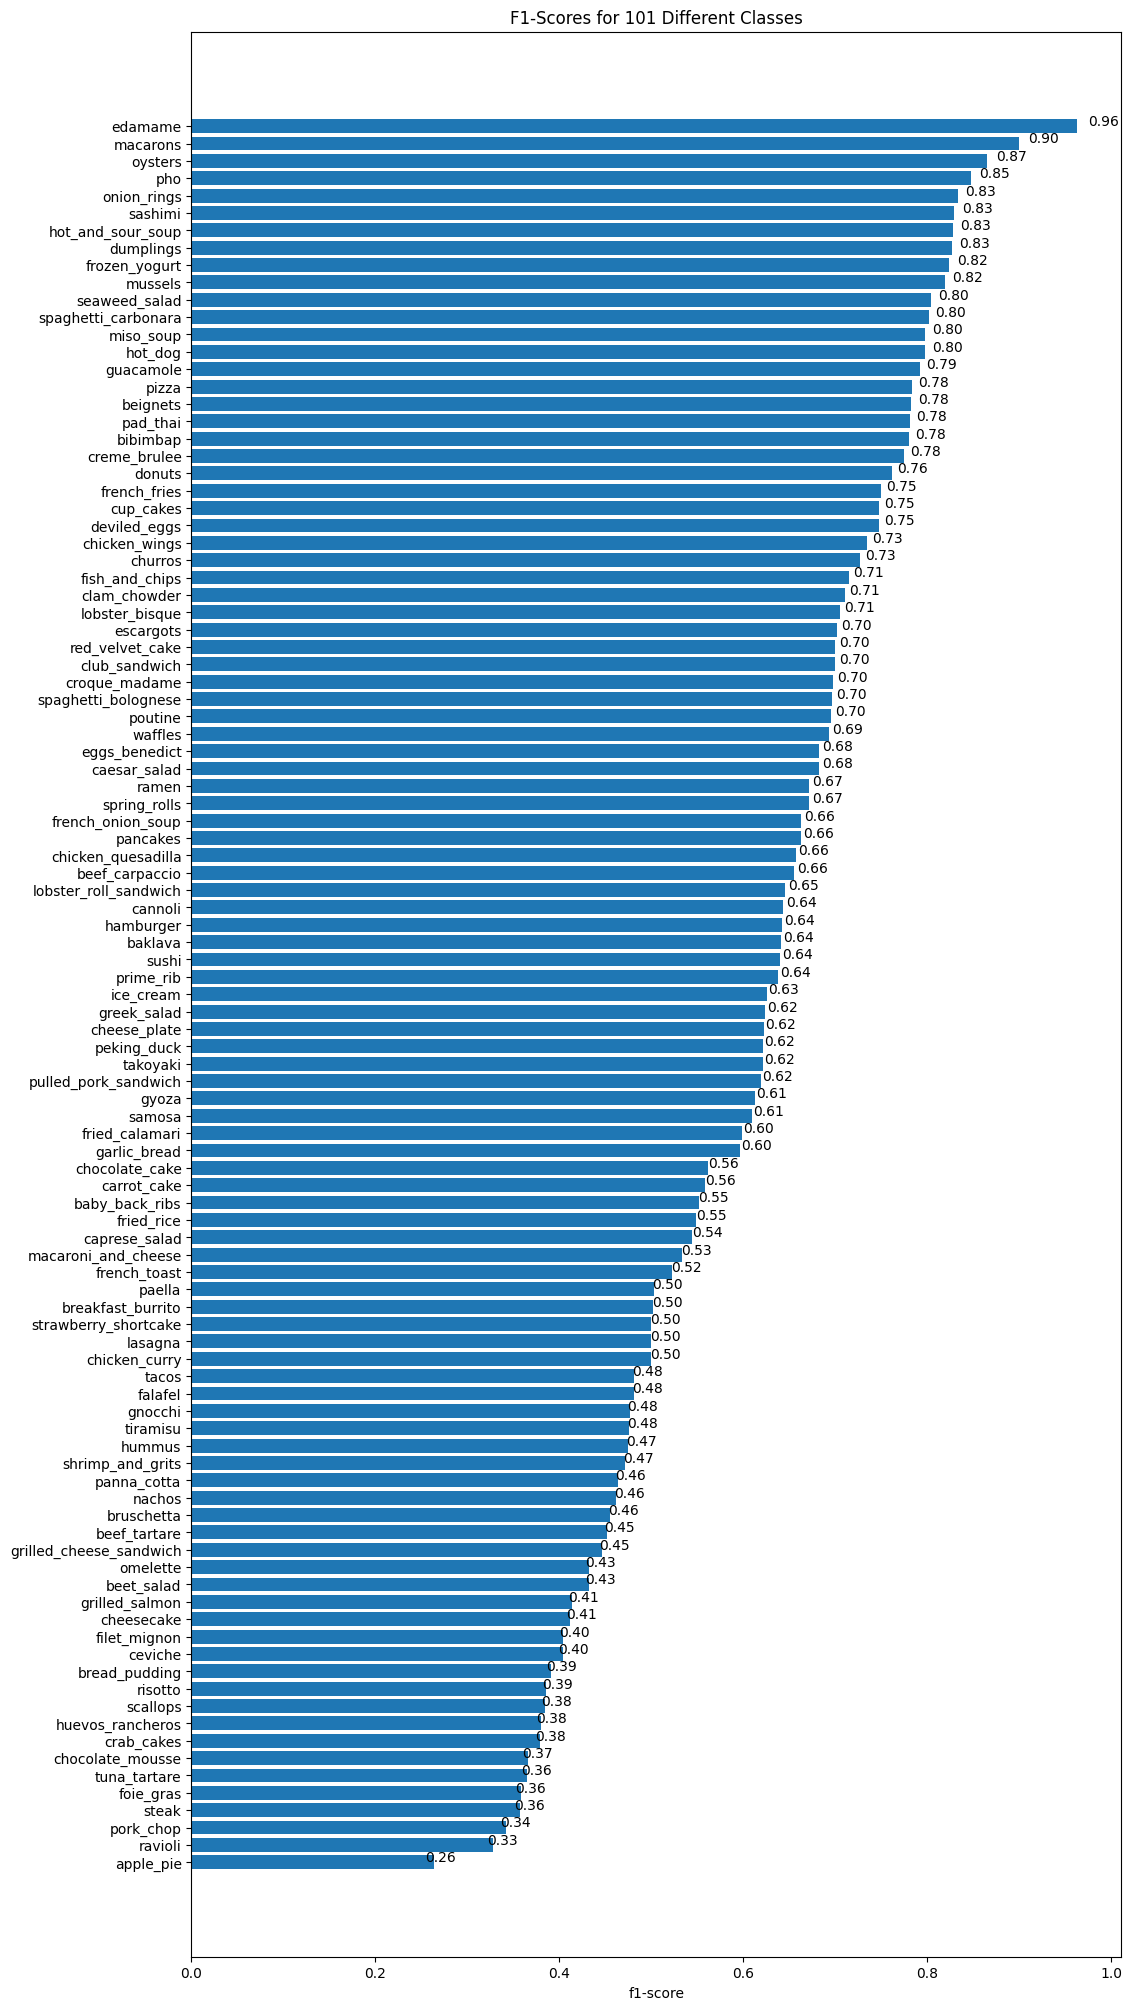

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 101 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

## Function to load and prepare images

In [ ]:
def load_and_prep_image(filename, image_shape = 224, scale = True):
  """
  Reads an image from filename, turn it into tensor and reshapes into specified shape
  """

  # load image
  img = tf.io.read_file(filename)

  # decode image into tensor
  img = tf.io.decode_image(img, channels = 3)

  # resize image
  img = tf.image.resize(img, [image_shape, image_shape])

  # scale?

  if scale:
    return img / 255.
  else:
    return img

## Visualize images, target label and prediction

1/1 [==============================] - 0s 27ms/step


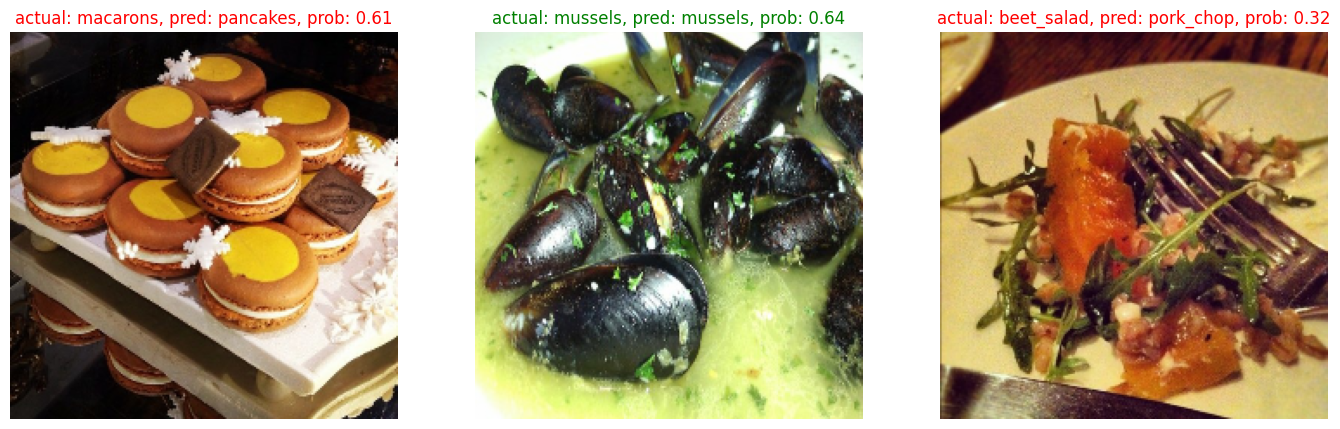

In [ ]:
# Make preds on a series of random images
import os
import random

class_names = train_data_all_10_percent.class_names

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + '/' + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

## Finding the most wrong predictions

To find out where our model is most wrong, let's write some code to find out the following:
1. Get all of the image file paths in the test dataset using list_files() method
2. Create a pandas DataFrame of the image filepaths, ground truth labels, predicted classes (from our model), max prediction probabilities, predictions classes and ground truths classes
3. Use our DataFrame to find all the wrong predictions (where the ground truth label doesn't match the prediction)
4. Sort the DataFrame based on wrong predictions (have the highest prediction probability predictions at the top).
5. Visualize the images with the highest prediction probabilities but have the wrong prediction.

In [ ]:
# 1. Get all of the image file paths in the test dataset using list_files() method

filepaths = []
for filepath in test_data.list_files('/content/101_food_classes_10_percent/test/*/*.jpg',
                                     shuffle = False):
  filepaths.append(filepath.numpy())

filepaths[:10]

[b'/content/101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [ ]:
# 2. Create a pandas DataFrame of the image filepaths, ground truth labels, predicted classes (from our model), max prediction probabilities, predictions classes and ground truths classes

import pandas as pd
pred_df = pd.DataFrame({'img_path':filepaths,
                        'y_true':y_labels,
                        'y_pred':pred_classes,
                        'pred_conf':preds_probs.max(axis = 1),
                        'y_true_classname':[class_names[i] for i in y_labels],
                        'y_pred_classname':[class_names[i] for i in pred_classes]})
pred_df

img_path  y_true  y_pred  \
0      b'/content/101_food_classes_10_percent/test/ap...       0       2   
1      b'/content/101_food_classes_10_percent/test/ap...       0       0   
2      b'/content/101_food_classes_10_percent/test/ap...       0       0   
3      b'/content/101_food_classes_10_percent/test/ap...       0       8   
4      b'/content/101_food_classes_10_percent/test/ap...       0       8   
...                                                  ...     ...     ...   
25245  b'/content/101_food_classes_10_percent/test/wa...     100     100   
25246  b'/content/101_food_classes_10_percent/test/wa...     100      16   
25247  b'/content/101_food_classes_10_percent/test/wa...     100     100   
25248  b'/content/101_food_classes_10_percent/test/wa...     100      94   
25249  b'/content/101_food_classes_10_percent/test/wa...     100     100   

       pred_conf y_true_classname      y_pred_classname  
0       0.285024        apple_pie               baklava  
1       0.863791        apple_pie             apple_pie  
2       0.379804        apple_pie             apple_pie  
3       0.274799        apple_pie         bread_pudding  
4       0.618250        apple_pie         bread_pudding  
...          ...              ...                   ...  
25245   0.979885          waffles               waffles  
25246   0.835360          waffles          cheese_plate  
25247   0.490755          waffles               waffles  
25248   0.349450          waffles  strawberry_shortcake  
25249   0.443246          waffles               waffles  

[25250 rows x 6 columns]

In [ ]:
# 3. Use our DataFrame to find all the wrong predictions (where the ground truth label doesn't match the prediction)

pred_df['pred_correct'] = pred_df['y_true'] == pred_df['y_pred']
pred_df = pred_df[pred_df['pred_correct'] == False]
pred_df

img_path  y_true  y_pred  \
0      b'/content/101_food_classes_10_percent/test/ap...       0       2   
3      b'/content/101_food_classes_10_percent/test/ap...       0       8   
4      b'/content/101_food_classes_10_percent/test/ap...       0       8   
5      b'/content/101_food_classes_10_percent/test/ap...       0      78   
6      b'/content/101_food_classes_10_percent/test/ap...       0      29   
...                                                  ...     ...     ...   
25233  b'/content/101_food_classes_10_percent/test/wa...     100      30   
25236  b'/content/101_food_classes_10_percent/test/wa...     100      22   
25243  b'/content/101_food_classes_10_percent/test/wa...     100      23   
25246  b'/content/101_food_classes_10_percent/test/wa...     100      16   
25248  b'/content/101_food_classes_10_percent/test/wa...     100      94   

       pred_conf y_true_classname      y_pred_classname  pred_correct  
0       0.285024        apple_pie               baklava         False  
3       0.274799        apple_pie         bread_pudding         False  
4       0.618250        apple_pie         bread_pudding         False  
5       0.702141        apple_pie               poutine         False  
6       0.871129        apple_pie             cup_cakes         False  
...          ...              ...                   ...           ...  
25233   0.517620          waffles          deviled_eggs         False  
25236   0.199825          waffles      chocolate_mousse         False  
25243   0.160727          waffles               churros         False  
25246   0.835360          waffles          cheese_plate         False  
25248   0.349450          waffles  strawberry_shortcake         False  

[9889 rows x 7 columns]

In [ ]:
# 4. Sort the DataFrame based on wrong predictions (have the highest prediction probability predictions at the top).

top_100_wrong = pred_df.sort_values('pred_conf', ascending = False)[:100].reset_index(drop = True)
top_100_wrong

img_path  y_true  y_pred  \
0   b'/content/101_food_classes_10_percent/test/fr...      43      68   
1   b'/content/101_food_classes_10_percent/test/ga...      46      10   
2   b'/content/101_food_classes_10_percent/test/st...      93       1   
3   b'/content/101_food_classes_10_percent/test/ch...      20      38   
4   b'/content/101_food_classes_10_percent/test/ca...      12      98   
..                                                ...     ...     ...   
95  b'/content/101_food_classes_10_percent/test/su...      95      86   
96  b'/content/101_food_classes_10_percent/test/ra...      82      84   
97  b'/content/101_food_classes_10_percent/test/ce...      15      57   
98  b'/content/101_food_classes_10_percent/test/pa...      72      98   
99  b'/content/101_food_classes_10_percent/test/ch...      23       6   

    pred_conf y_true_classname y_pred_classname  pred_correct  
0    0.997102   fried_calamari      onion_rings         False  
1    0.996738     garlic_bread       bruschetta         False  
2    0.996037            steak   baby_back_ribs         False  
3    0.995572    chicken_wings   fish_and_chips         False  
4    0.995534          cannoli         tiramisu         False  
..        ...              ...              ...           ...  
95   0.965349            sushi          sashimi         False  
96   0.965295          ravioli          risotto         False  
97   0.964448          ceviche           hummus         False  
98   0.964429         pancakes         tiramisu         False  
99   0.964335          churros         beignets         False  

[100 rows x 7 columns]

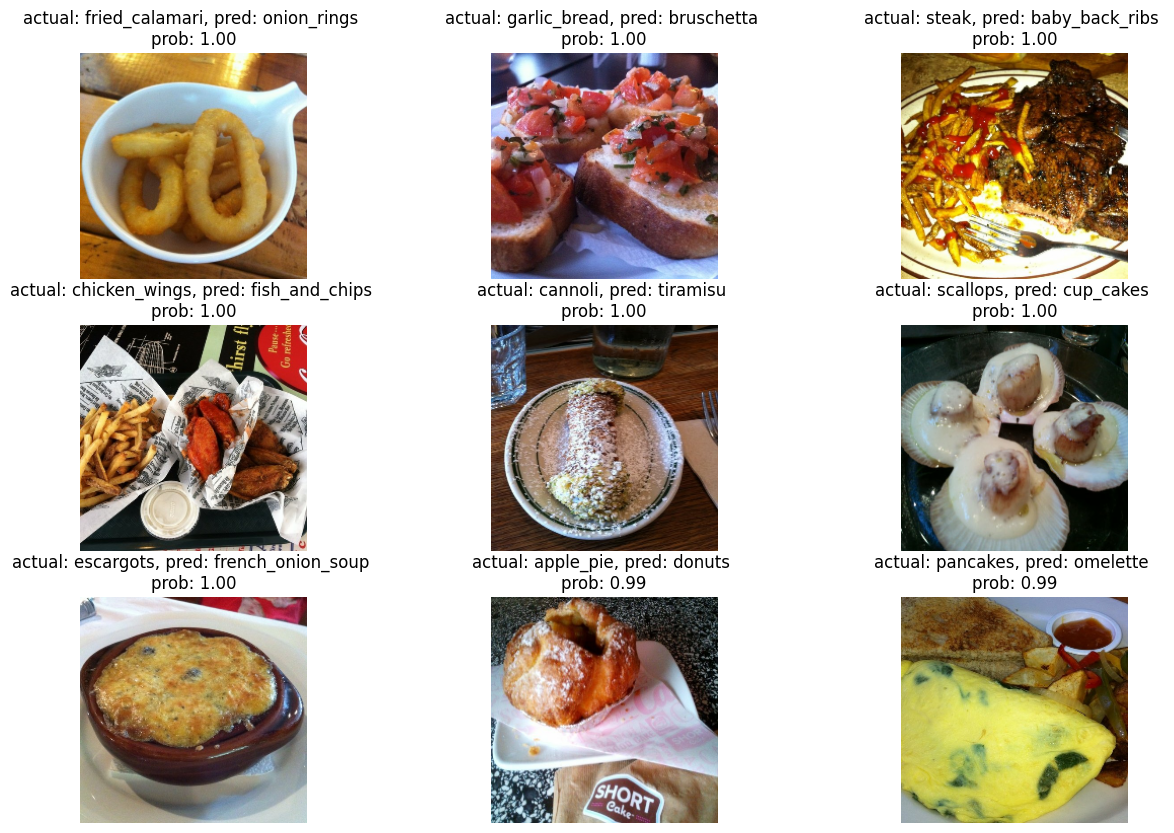

In [ ]:
# 5. Visualize the images with the highest prediction probabilities but have the wrong prediction.

images_to_view = 9
start_index = 0
plt.figure(figsize = (15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3,3,i+1)
  img = load_and_prep_image(row[1], scale = False)
  _, _, _, _,pred_prob, y_true_classname, y_pred_classname, _ = row # only interested in a few parameters in a row
  plt.imshow(img/255.)
  plt.title(f'actual: {y_true_classname}, pred: {y_pred_classname} \nprob: {pred_prob:.2f}')
  plt.axis(False)

## Test out the big dog model on our own custom images

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip

unzip_data('custom_food_images.zip')

--2023-08-28 14:28:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.74.128, 173.194.192.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.74.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13192985 (13M) [application/zip]
Saving to: ‘custom_food_images.zip’

custom_food_images. 100%[===================>]  12.58M  77.9MB/s    in 0.2s    

2023-08-28 14:28:10 (77.9 MB/s) - ‘custom_food_images.zip’ saved [13192985/13192985]



In [ ]:
custom_food_images = ['custom_food_images/'+img_path for img_path in os.listdir('custom_food_images')]
custom_food_images

['custom_food_images/pizza-dad.jpeg',
 'custom_food_images/chicken_wings.jpeg',
 'custom_food_images/sushi.jpeg',
 'custom_food_images/hamburger.jpeg',
 'custom_food_images/ramen.jpeg',
 'custom_food_images/steak.jpeg']

1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 25ms/step


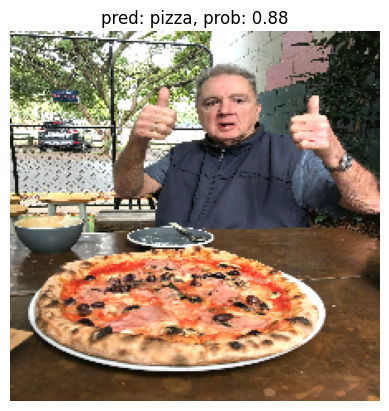

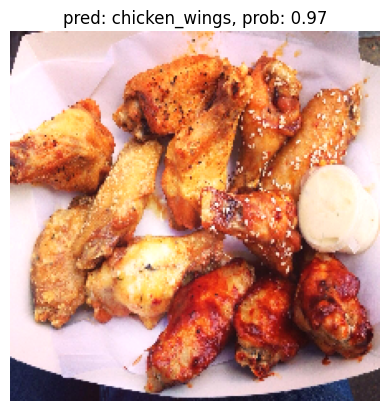

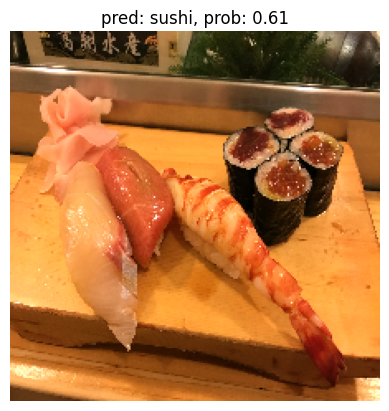

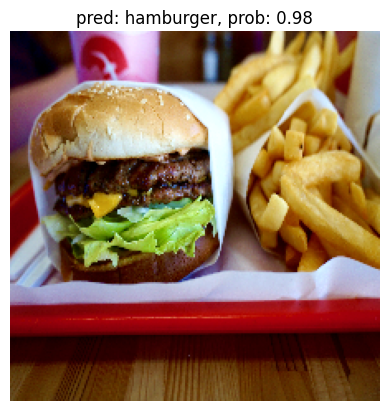

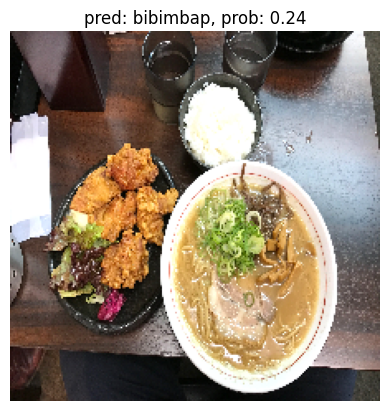

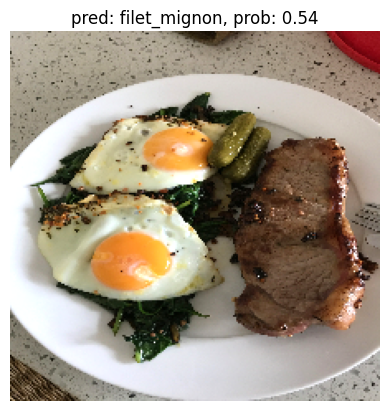

In [ ]:
# Make predictions on and plot custom food images

for img in custom_food_images:
  img = load_and_prep_image(img, scale = False) # we don't need to scale for EfficientNet
  pred_prob = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[pred_prob.argmax()]

  plt.figure()
  plt.imshow(img/225.)
  plt.title(f'pred: {pred_class}, prob: {pred_prob.max():.2f}')
  plt.axis(False)

1/1 [==============================] - 0s 115ms/step


(-0.5, 223.5, 223.5, -0.5)

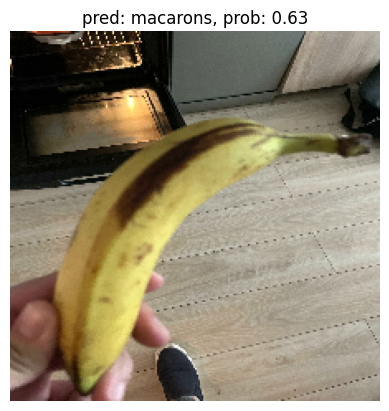

In [ ]:
img = load_and_prep_image('banan.jpeg', scale = False) # we don't need to scale for EfficientNet
pred_prob = model.predict(tf.expand_dims(img, axis = 0))
pred_class = class_names[pred_prob.argmax()]
plt.figure()
plt.imshow(img/225.)
plt.title(f'pred: {pred_class}, prob: {pred_prob.max():.2f}')
plt.axis(False)

1/1 [==============================] - 0s 94ms/step


(-0.5, 223.5, 223.5, -0.5)

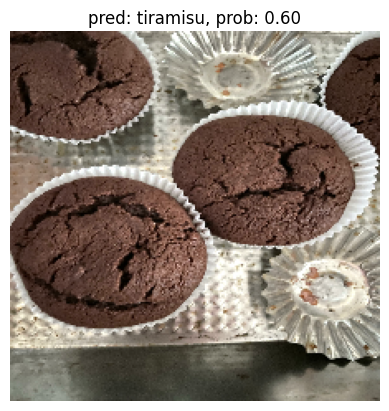

In [ ]:
img = load_and_prep_image('muffin.jpeg', scale = False) # we don't need to scale for EfficientNet
pred_prob = model.predict(tf.expand_dims(img, axis = 0))
pred_class = class_names[pred_prob.argmax()]
plt.figure()
plt.imshow(img/225.)
plt.title(f'pred: {pred_class}, prob: {pred_prob.max():.2f}')
plt.axis(False)

1/1 [==============================] - 0s 73ms/step


(-0.5, 223.5, 223.5, -0.5)

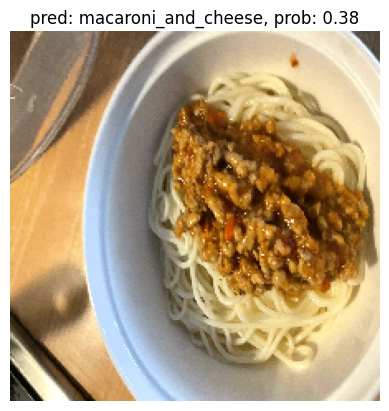

In [ ]:
img = load_and_prep_image('spaghetti.jpeg', scale = False) # we don't need to scale for EfficientNet
pred_prob = model.predict(tf.expand_dims(img, axis = 0))
pred_class = class_names[pred_prob.argmax()]
plt.figure()
plt.imshow(img/225.)
plt.title(f'pred: {pred_class}, prob: {pred_prob.max():.2f}')
plt.axis(False)

The model didn't perform well... That's mainly due to small training dataset. In the upcoming model we're going to improve accuracy with full training dataset.

# Exercise

Train a feature-extraction transfer learning model for 10 epochs on the same data and compare its performance versus a model which used feature extraction for 5 epochs and fine-tuning for 5 epochs (like we've used in this notebook). Which method is better?

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential



# DATA SETUP
unzip_data('101_food_classes_10_percent.zip')
train_dir = '101_food_classes_10_percent/train'
test_dir =  '101_food_classes_10_percent/test'
walk_through_dir('101_food_classes_10_percent')

IMG_SIZE = (224, 224)



# DATA FLOW
train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode = 'categorical',
                                                                 image_size = IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode = 'categorical',
                                                                 image_size = IMG_SIZE,
                                                                 shuffle = False) # we want to keep the same order as it is to fit labels, howver later on we will add functionality for proper shuffeling
# DATA AUGMENTATION
data_augmentation = Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),

], name = 'data_augmentation')

--2023-09-06 20:11:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-09-06 20:11:42 (74.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]

--2023-09-06 20:11:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

## Feature Extraction 10 epochs

In [3]:
base_model_fe10 = tf.keras.applications.EfficientNetB0(include_top = False)

# FEATURE EXTRACTION MODEL
base_model_fe10.trainable = False

inputs = layers.Input(shape=(224,224,3), name = 'input_layer')
x = data_augmentation(inputs)
x = base_model_fe10(x, training = False)
x = layers.GlobalAveragePooling2D(name = 'global_avg_pool_layer')(x)
# we need to have 101 points in our output dense layers since we have 101 classes
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation = 'softmax', name = 'output_layer')(x)
model_fe10 = tf.keras.Model(inputs, outputs)


# COMPILE
model_fe10.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

# FIT
history_fe10 = model_fe10.fit(train_data_all_10_percent,
                                           epochs = 10,
                                           validation_data = test_data,
                                           validation_steps = int(0.15 * len(test_data)))

Epoch 1/10
237/237 [==============================] - 152s 564ms/step - loss: 3.3635 - accuracy: 0.2752 - val_loss: 2.5192 - val_accuracy: 0.4462
Epoch 2/10
237/237 [==============================] - 86s 359ms/step - loss: 2.2017 - accuracy: 0.5002 - val_loss: 2.0490 - val_accuracy: 0.5130
Epoch 3/10
237/237 [==============================] - 85s 357ms/step - loss: 1.8252 - accuracy: 0.5677 - val_loss: 1.8756 - val_accuracy: 0.5318
Epoch 4/10
237/237 [==============================] - 68s 282ms/step - loss: 1.6143 - accuracy: 0.6099 - val_loss: 1.7778 - val_accuracy: 0.5456
Epoch 5/10
237/237 [==============================] - 77s 321ms/step - loss: 1.4566 - accuracy: 0.6405 - val_loss: 1.7225 - val_accuracy: 0.5516
Epoch 6/10
237/237 [==============================] - 70s 292ms/step - loss: 1.3312 - accuracy: 0.6742 - val_loss: 1.7006 - val_accuracy: 0.5559
Epoch 7/10
237/237 [==============================] - 53s 221ms/step - loss: 1.2270 - accuracy: 0.6911 - val_loss: 1.6886 - val_a

## Feature Extraction 5 epochs + Fine Tuning 5 epochs

In [12]:
base_model_fe5ft5 = tf.keras.applications.EfficientNetB0(include_top = False)

# FEATURE EXTRACTION MODEL
base_model_fe5ft5.trainable = False

inputs = layers.Input(shape=(224,224,3), name = 'input_layer')
x = data_augmentation(inputs)
x = base_model_fe5ft5(x, training = False)
x = layers.GlobalAveragePooling2D(name = 'global_avg_pool_layer')(x)
# we need to have 101 points in our output dense layers since we have 101 classes
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation = 'softmax', name = 'output_layer')(x)
model_fe5ft5 = tf.keras.Model(inputs, outputs)

# COMPILE
model_fe5ft5.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

# FIT
history_fe5ft5 = model_fe5ft5.fit(train_data_all_10_percent,
                                           epochs = 5,
                                           validation_data = test_data,
                                           validation_steps = int(0.15 * len(test_data))
                                           )

Epoch 1/5
237/237 [==============================] - 57s 205ms/step - loss: 3.3534 - accuracy: 0.2763 - val_loss: 2.5445 - val_accuracy: 0.4213
Epoch 2/5
237/237 [==============================] - 43s 179ms/step - loss: 2.1844 - accuracy: 0.5009 - val_loss: 2.0584 - val_accuracy: 0.5026
Epoch 3/5
237/237 [==============================] - 35s 146ms/step - loss: 1.8078 - accuracy: 0.5698 - val_loss: 1.8769 - val_accuracy: 0.5244
Epoch 4/5
237/237 [==============================] - 39s 164ms/step - loss: 1.5957 - accuracy: 0.6104 - val_loss: 1.8208 - val_accuracy: 0.5389
Epoch 5/5
237/237 [==============================] - 35s 147ms/step - loss: 1.4489 - accuracy: 0.6478 - val_loss: 1.7632 - val_accuracy: 0.5456


In [15]:
# FINE TUNE
base_model_fe5ft5.trainable = True # all layers trainable

# leave trainable only 5 last layers
for layer in base_model_fe5ft5.layers[:-5]:
  layer.trainable = False

# RECOMPILE
model_fe5ft5.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), # lr lowered by 10x (rule of thumb), while we moving into fine tuning we should make our lr a bit smaller
              metrics = ['accuracy'])

# FIT
fine_tune_epochs = 5 # model has already done 5 epochs (feature extraction), now we will add 5 more epochs

# Fine-tune our model
history_fe5ft5_ = model_fe5ft5.fit(train_data_all_10_percent,
                                                     epochs = 5 + fine_tune_epochs,
                                                     validation_data = test_data,
                                                     validation_steps = int(0.15 * len(test_data)),
                                                     initial_epoch = history_fe5ft5.epoch[-1]) # we start from last epoch

Epoch 5/10
237/237 [==============================] - 47s 159ms/step - loss: 1.0994 - accuracy: 0.7068 - val_loss: 1.7030 - val_accuracy: 0.5519
Epoch 6/10
237/237 [==============================] - 33s 139ms/step - loss: 1.0125 - accuracy: 0.7298 - val_loss: 1.7018 - val_accuracy: 0.5553
Epoch 7/10
237/237 [==============================] - 36s 149ms/step - loss: 0.9390 - accuracy: 0.7469 - val_loss: 1.6801 - val_accuracy: 0.5585
Epoch 8/10
237/237 [==============================] - 35s 147ms/step - loss: 0.8903 - accuracy: 0.7615 - val_loss: 1.6913 - val_accuracy: 0.5599
Epoch 9/10
237/237 [==============================] - 36s 148ms/step - loss: 0.8487 - accuracy: 0.7694 - val_loss: 1.7160 - val_accuracy: 0.5556
Epoch 10/10
237/237 [==============================] - 34s 143ms/step - loss: 0.7845 - accuracy: 0.7880 - val_loss: 1.7133 - val_accuracy: 0.5543


## Compare

In [16]:
fe10_results = model_fe10.evaluate(test_data)
fe5ft5_results = model_fe5ft5.evaluate(test_data)


print('fe10_results: ',fe10_results)
print('fe5ft5_results: ',fe5ft5_results)

790/790 [==============================] - 63s 80ms/step - loss: 1.4931 - accuracy: 0.6085
fe10_results:  [1.5045822858810425, 0.5990495085716248]
fe5ft5_results:  [1.4930728673934937, 0.6085148453712463]


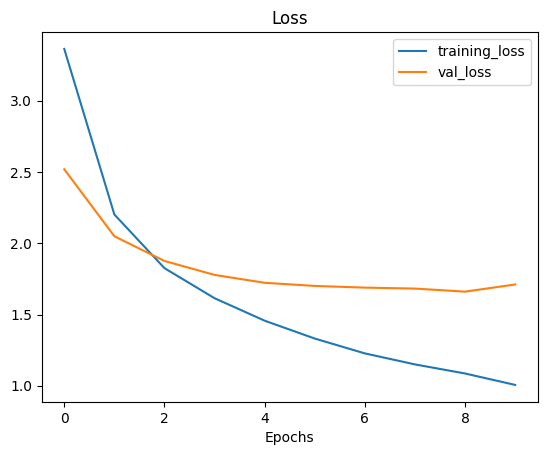

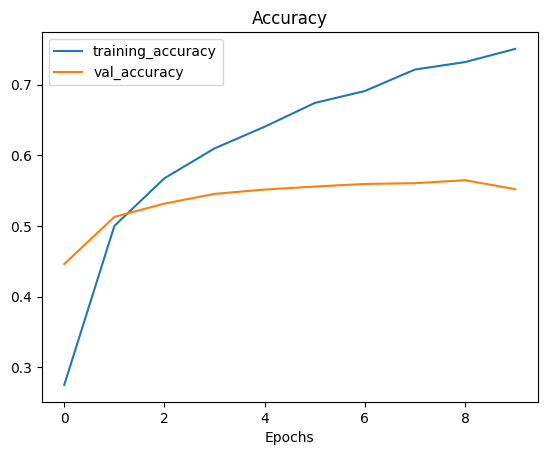

In [17]:
fe10_plot = plot_loss_curves(history_fe10)

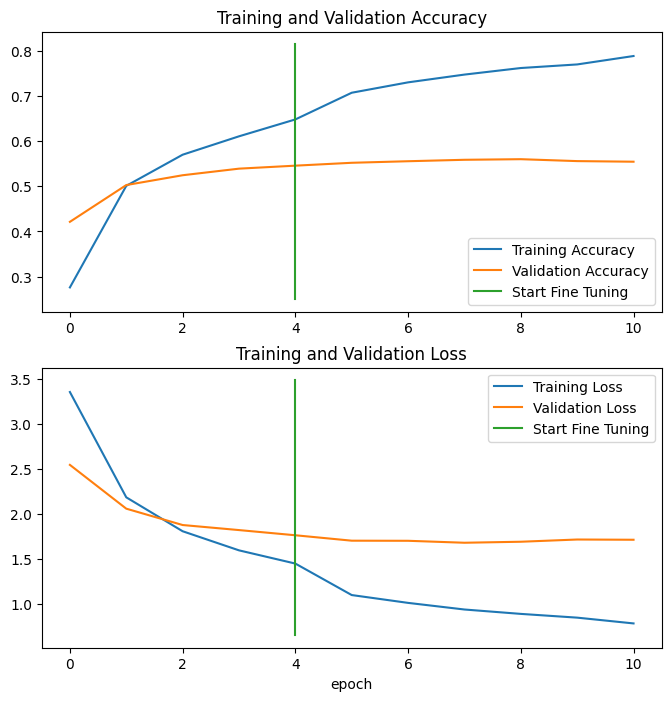

In [18]:
fe5ft5_plot = compare_historys(original_history = history_fe5ft5,
              new_history = history_fe5ft5_,
              initial_epochs = 5)

As we can see above fine tuning had barely better accuracy, however from plots we can see that fine tunning just deepened overfitting. Apparently 10% of full dataset is not enough to fit more than around 50% of data, which is still quite nice accuracy taking into account that we have 101 classes. However we can improve with full training dataset.